In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [4]:
df_1 = pd.read_csv('glass_data.csv')
df_1

,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      214 non-null    int64  
 1   ri      214 non-null    float64
 2   na      214 non-null    float64
 3   mg      214 non-null    float64
 4   al      214 non-null    float64
 5   si      214 non-null    float64
 6   k       214 non-null    float64
 7   ca      214 non-null    float64
 8   ba      214 non-null    float64
 9   fe      214 non-null    float64
 10  type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
df_1.shape

(214, 11)

In [7]:
df_1.isnull().sum()

id      0
ri      0
na      0
mg      0
al      0
si      0
k       0
ca      0
ba      0
fe      0
type    0
dtype: int64

In [42]:
df_zero = (df_1 == 0).sum()

In [44]:
df_zero

id        0
ri        0
na        0
mg       42
al        0
si        0
k        30
ca        0
ba      176
fe      144
type      0
dtype: int64

In [90]:
# Check percentage of 0 values
zero_percentage = (df_1 == 0).mean() * 100
print(zero_percentage)

id       0.000000
ri       0.000000
na       0.000000
mg      19.626168
al       0.000000
si       0.000000
k       14.018692
ca       0.000000
ba      82.242991
fe      67.289720
type     0.000000
dtype: float64


In [ ]:
# Replace 0.00 with mean or median

In [10]:
df_1.describe()

,id,ri,na,mg,al,si,k,ca,ba,fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [94]:
df_1['type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [11]:
df_1.duplicated().sum()

0

<Axes: xlabel='type', ylabel='count'>

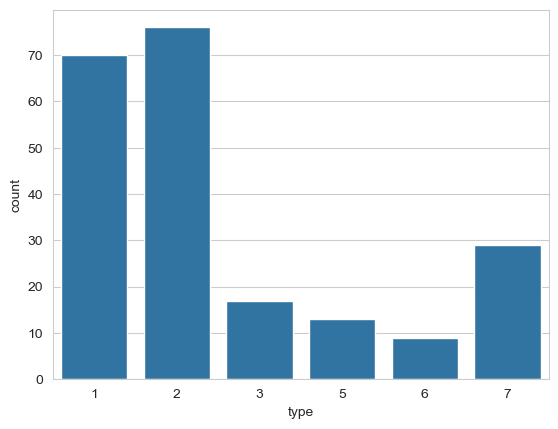

In [96]:
# 60 / 40 is ok
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='type',data=df_1)

In [98]:
#Balane the data

In [ ]:
#Check outliers

In [12]:
# Split features and target variable
X = df_1.drop('type', axis=1)
y = df_1['type']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Build the model
def build_dens_model():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [15]:
model = build_dens_model()
model.summary()

C:\Users\kpscu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,729 (38.00 KB)

 Trainable params: 9,729 (38.00 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.1397 - loss: -29.5281 - val_accuracy: 0.2571 - val_loss: -107.2258
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3721 - loss: -85.4307 - val_accuracy: 0.2571 - val_loss: -179.4880
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3539 - loss: -142.5374 - val_accuracy: 0.2571 - val_loss: -251.4155
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3604 - loss: -176.6997 - val_accuracy: 0.2571 - val_loss: -331.4628
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3786 - loss: -272.3843 - val_accuracy: 0.2571 - val_loss: -424.6948
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3413 - loss: -314.6927 - val_accuracy: 0.2571 - val_loss: -530.7986
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3752 - loss: -421.1208 - val_accuracy: 0.2571 - val_loss: -655.1483
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3626 - loss: -498.6021 - va

In [18]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

2/2 - 0s - 17ms/step - accuracy: 0.2558 - loss: -1.2959e+03

Test accuracy: 0.25581395626068115


In [19]:
# Make predictions
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [20]:
# Create a DataFrame to display actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': np.round(y_pred.flatten())})
print(results)

     Actual  Predicted
9         1        1.0
197       7        1.0
66        1        1.0
191       7        1.0
117       2        1.0
111       2        1.0
15        1        1.0
86        2        1.0
75        2        1.0
144       2        1.0
182       6        1.0
170       5        1.0
141       2        1.0
73        2        1.0
178       6        1.0
167       5        1.0
190       7        1.0
18        1        1.0
45        1        1.0
184       6        1.0
98        2        1.0
209       7        1.0
211       7        1.0
195       7        1.0
148       3        1.0
104       2        1.0
30        1        1.0
25        1        1.0
175       5        1.0
16        1        1.0
55        1        1.0
138       2        1.0
158       3        1.0
93        2        1.0
69        1        1.0
203       7        1.0
171       5        1.0
152       3        1.0
97        2        1.0
84        2        1.0
101       2        1.0
200       7        1.0
60        1